<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/_time_series_forecasting_apple_stock_data_assignment_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the data
df = pd.read_csv('/content/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [ ]:
#Getting an idea about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


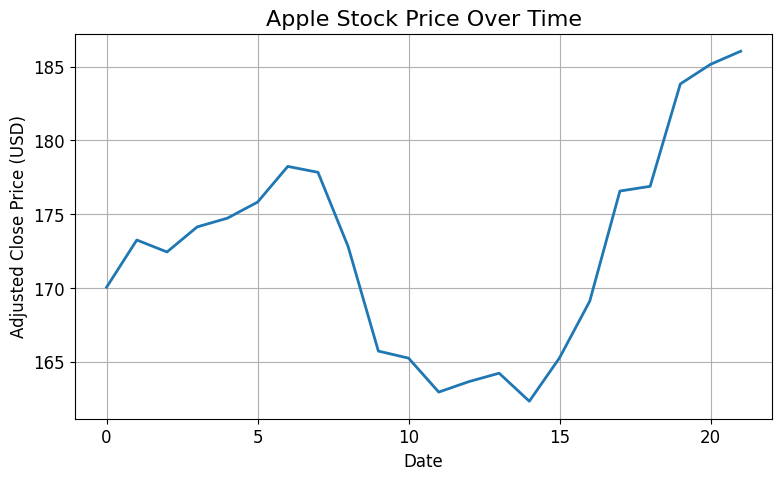

In [ ]:
#Plot
df['Adj Close'].plot(figsize=(9,5), linewidth=2, fontsize=12)
plt.title('Apple Stock Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Load your dataset
df = pd.read_csv("AAPL.csv", parse_dates=['Date'])

# Filter data from 2001 onwards
df = df[df['Date'].dt.year > 2000]

# Reset index
df.reset_index(drop=True, inplace=True)

print(df.head())
print(df['Date'].min(), "to", df['Date'].max())

        Date        Open        High         Low       Close   Adj Close  \
0 2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1 2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2 2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3 2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4 2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  
2014-09-29 00:00:00 to 2018-03-29 00:00:00


In [ ]:
#Performing EDA
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
#Summarize the Dataset
df.shape

(184, 7)

In [ ]:
#converting "Date" to date time
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


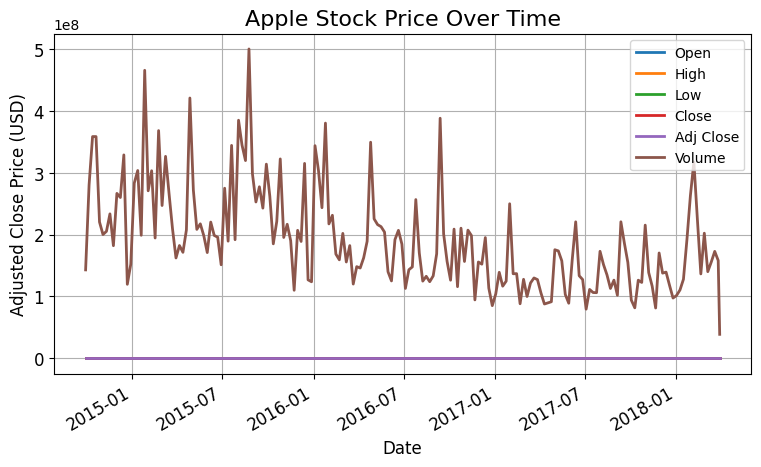

In [ ]:
#Plot
df.plot(figsize=(9,5), linewidth=2, fontsize=12)
plt.title('Apple Stock Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

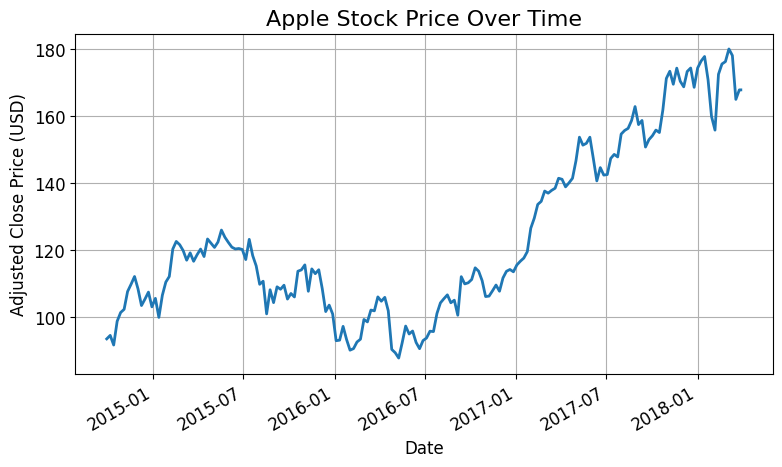

In [ ]:
#Plot
df['Adj Close'].plot(figsize=(9,5), linewidth=2, fontsize=12)
plt.title('Apple Stock Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

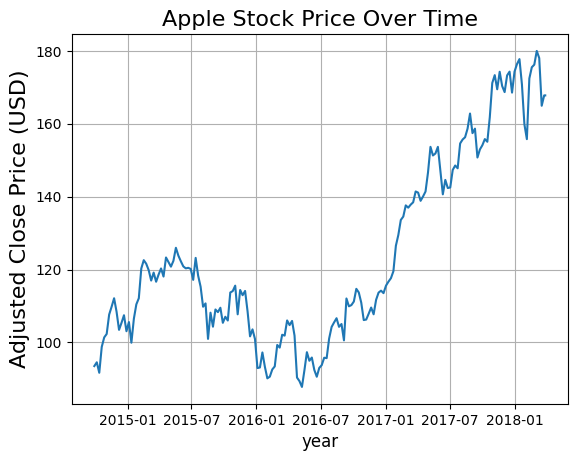

In [ ]:

plt.plot(df.index[-450:],df['Adj Close'][-450:])
plt.title('Apple Stock Price Over Time', fontsize=16)
plt.xlabel('year', fontsize=12)
plt.ylabel('Adjusted Close Price (USD)', fontsize =16)
plt.grid(True)
plt.show()

In [ ]:
yearly_close = df.groupby(df.index.year)['Adj Close'].mean()

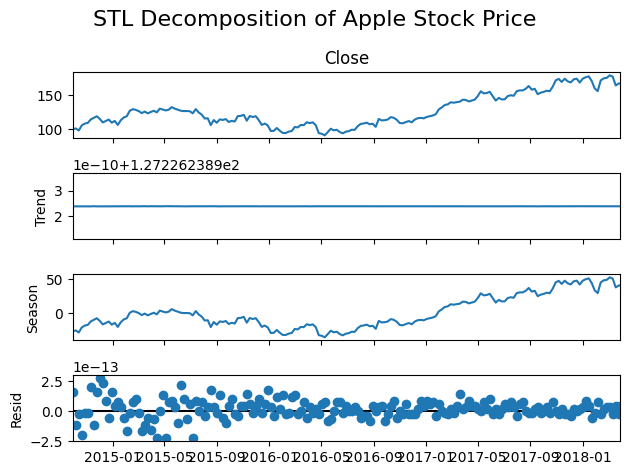

In [ ]:
#STL Decompostion
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Use 'Close' or 'Adj Close' for analysis
series = df['Close']

# Apply STL decomposition (choose period based on suspected seasonality)
stl = STL(series, period=252)
result = stl.fit()

# Plot the decomposition
result.plot()
plt.suptitle("STL Decomposition of Apple Stock Price", fontsize=16)
plt.tight_layout()
plt.show()


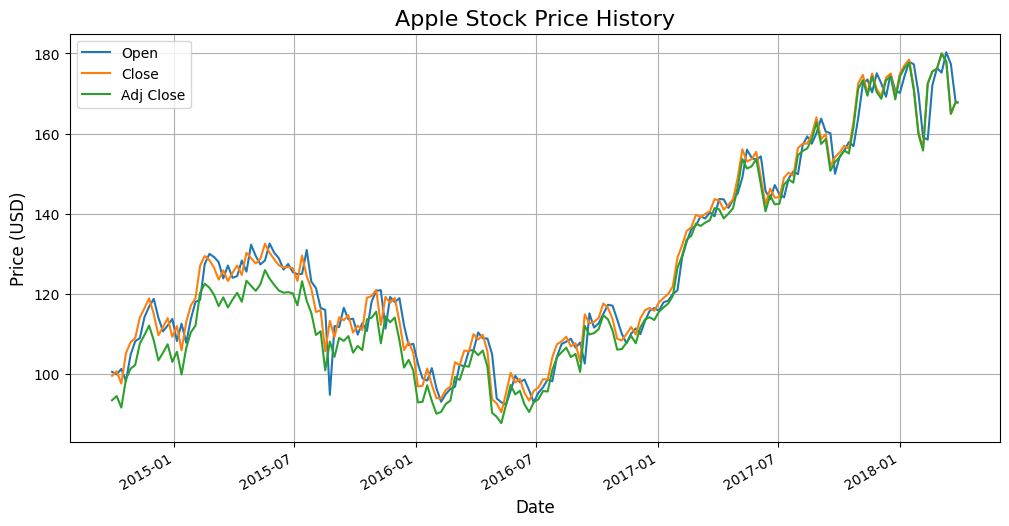

In [ ]:
#plot
df[['Open', 'Close', 'Adj Close']].plot(figsize=(12,6), linewidth=1.5)
plt.title('Apple Stock Price History', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

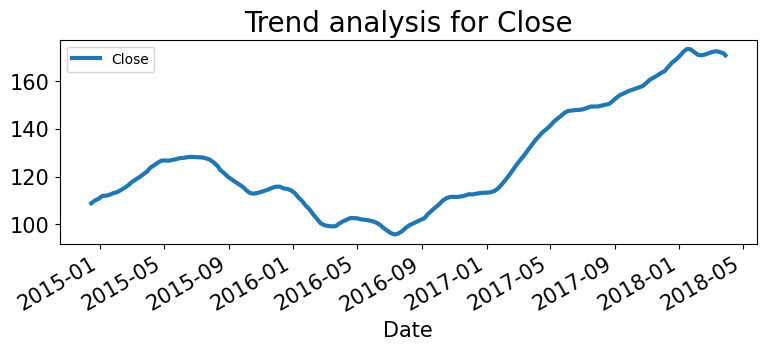

In [ ]:
#Check for trend
close = df[['Close']]
close.rolling(12).mean().plot(figsize = (9,3) , linewidth =3 , fontsize =15)
plt.title('Trend analysis for Close' , fontsize =20)
plt.xlabel('Date' , fontsize =15)
plt.show()

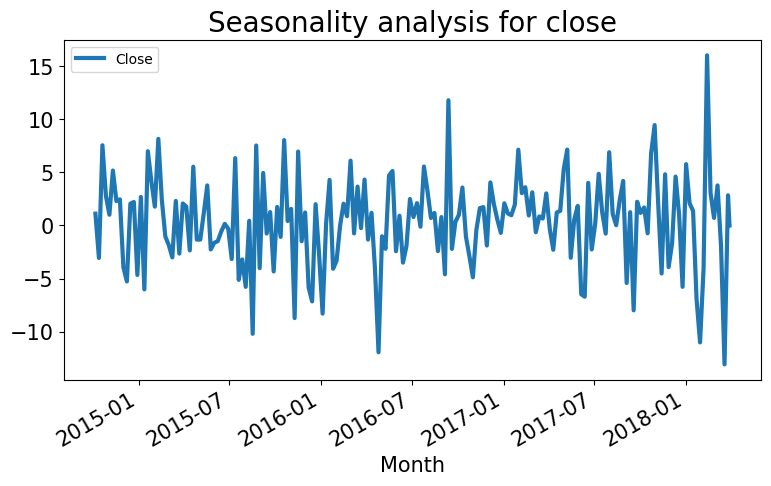

In [ ]:
#Check for seasonality
close.diff().plot(figsize =(9, 5) , linewidth =3 , fontsize =15)
plt.title('Seasonality analysis for close' , fontsize =20)
plt.xlabel('Month' , fontsize =15)
plt.show()

In [ ]:
#ARIMA for close prediction
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(close , order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  184
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -521.151
Date:                Wed, 30 Jul 2025   AIC                           1048.303
Time:                        23:08:23   BIC                           1057.931
Sample:                             0   HQIC                          1052.205
                                - 184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9655      0.048    -20.171      0.000      -1.059      -0.872
ma.L1          0.9140      0.075     12.221      0.000       0.767       1.061
sigma2        17.4021      1.539     11.311      0.0

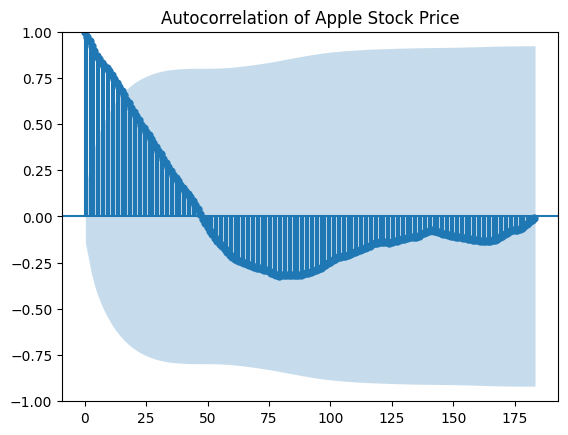

In [ ]:
#ACP plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=183, title="Autocorrelation of Apple Stock Price")
plt.show()


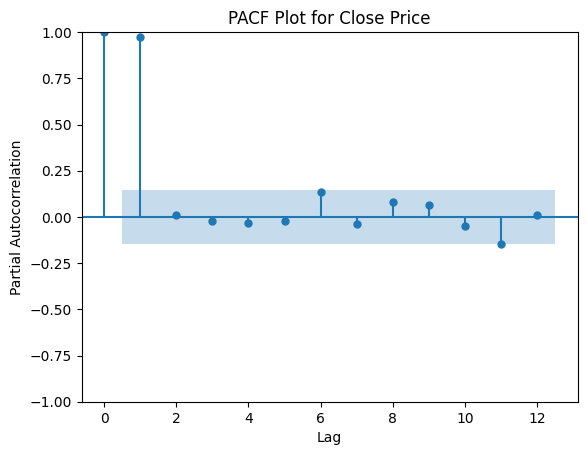

In [ ]:
#PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf

# Pass only the 'Close' column as a Series
plot_pacf(close['Close'], lags=12)
plt.title('PACF Plot for Close Price')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(close['Close'])
print("📉 Augmented Dickey-Fuller Test:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] <= 0.05:
    print("Data is stationary — you can use it directly for ARIMA.")
else:
    print("Data is NOT stationary — you should apply differencing.")

📉 Augmented Dickey-Fuller Test:
ADF Statistic: -0.8682020594992511
p-value: 0.7982635382803849
Data is NOT stationary — you should apply differencing.


In [ ]:
#Fitting the ARIMA Model(Basic)
model_arima = ARIMA(close , order = (1,1,1))
model_arima_fit = model_arima.fit()
print('\nARIMA Model Summary:\n')
print(model_arima_fit.summary())


ARIMA Model Summary:

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  184
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -521.151
Date:                Wed, 30 Jul 2025   AIC                           1048.303
Time:                        23:09:01   BIC                           1057.931
Sample:                             0   HQIC                          1052.205
                                - 184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9655      0.048    -20.171      0.000      -1.059      -0.872
ma.L1          0.9140      0.075     12.221      0.000       0.767       1.061
sigma2        17.4021      1.

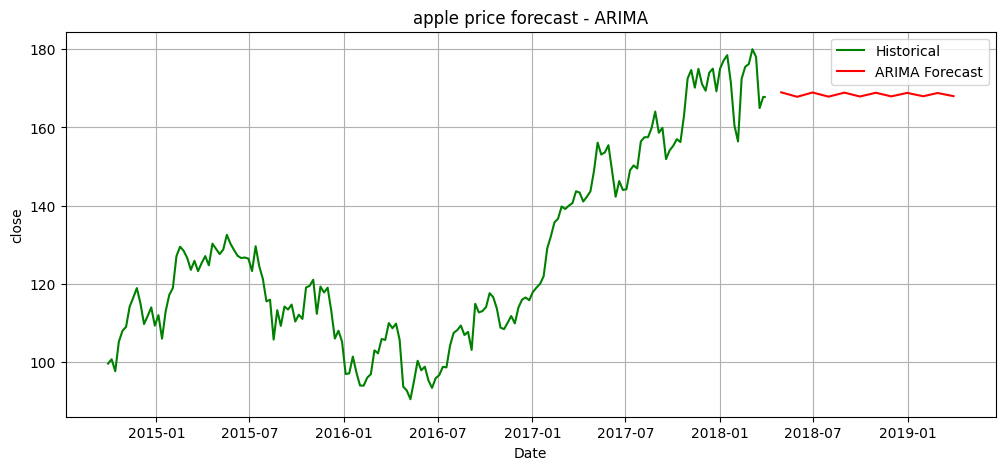

In [ ]:
#Forecasting using ARIMA
forecast_arima = model_arima_fit.forecast(steps = 12)
forecast_index = pd.date_range(start = close.index[-1] + pd.DateOffset(months = 1) , periods = 12 , freq = 'M')

#Plot
plt.figure(figsize = (12 , 5) )
plt.plot(close, label = 'Historical' , color = 'green')
plt.plot(forecast_index , forecast_arima , label = 'ARIMA Forecast' , color = 'red')
plt.title('apple price forecast - ARIMA')
plt.xlabel('Date')
plt.ylabel('close')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#SARIMA for close prediction
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(close , order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  184
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -521.151
Date:                Wed, 30 Jul 2025   AIC                           1048.303
Time:                        23:09:11   BIC                           1057.931
Sample:                             0   HQIC                          1052.205
                                - 184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9655      0.048    -20.171      0.000      -1.059      -0.872
ma.L1          0.9140      0.075     12.221      0.000       0.767       1.061
sigma2        17.4021      1.539     11.311      0.0

In [ ]:
#Fitting the SARIMA Model(Basic)
model_sarimax = SARIMAX(close, order = (1,1,1) , seasonal_order = (1,1,1,10))
model_sarimax_fit = model_sarimax.fit()
print('\nSARIMA Model Summary:\n')
print(model_sarimax_fit.summary())


SARIMA Model Summary:

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  184
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 10)   Log Likelihood                -509.555
Date:                            Wed, 30 Jul 2025   AIC                           1029.110
Time:                                    23:09:16   BIC                           1044.877
Sample:                                         0   HQIC                          1035.507
                                            - 184                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7887      0.322      2.446      0.014       0.157       1.420
ma.L1      

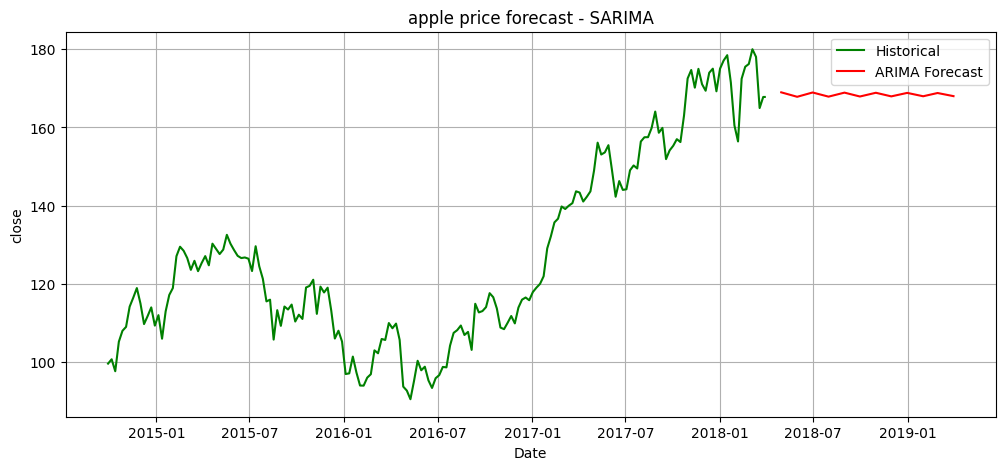

In [ ]:
#Forecasting using SARIMA
forecast_sarima = model_sarimax_fit.forecast(steps = 12)
forecast_index = pd.date_range(start = close.index[-1] + pd.DateOffset(months = 1) , periods = 12 , freq = 'M')

#Plot
plt.figure(figsize = (12 , 5) )
plt.plot(close, label = 'Historical' , color = 'green')
plt.plot(forecast_index , forecast_arima , label = 'ARIMA Forecast' , color = 'red')
plt.title('apple price forecast - SARIMA')
plt.xlabel('Date')
plt.ylabel('close')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Model comparison
print('Model comparison:')
print(f"ARIMA Model AIC : {model_arima_fit.aic}")
print(f"SARIMA Model AIC : {model_sarimax_fit.aic}")

#Select model based on lesser AIC
if model_arima_fit.aic < model_sarimax_fit.aic:
    print('\nARIMA Model is selected')
else:
    print('\nSARIMA Model is selected')

Model comparison:
ARIMA Model AIC : 1048.3025809711257
SARIMA Model AIC : 1029.110484008171

SARIMA Model is selected


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluation Metrics
forecast_steps = 30
actual = close['Close'][-forecast_steps:]

# Predict values from the model (retrain if needed for 30 steps)
model = ARIMA(close['Close'][:-forecast_steps], order=(1,1,1))
model_fit = model.fit()
predicted = model_fit.forecast(steps=forecast_steps)

# Ensure index aligns
predicted.index = actual.index

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

# Results
print(f"✅ Forecast Evaluation (ARIMA):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


✅ Forecast Evaluation (ARIMA):
RMSE: 12.3629
MAE:  10.7957
MAPE: 6.26%


In [ ]:
# Results
print(f"✅ Forecast Evaluation (ARIMA):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

✅ Forecast Evaluation (ARIMA):
RMSE: 12.3629
MAE:  10.7957
MAPE: 6.26%


In [ ]:
# Evaluation Metrics
forecast_steps = 30
train_data = close['Close'][:-forecast_steps]
test_data = close['Close'][-forecast_steps:]
model_sarimax = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarimax_fit = model_sarimax.fit()

# Forecast
forecast_sarima = model_sarimax_fit.forecast(steps=forecast_steps)

# Align forecast index to test data
forecast_sarima.index = test_data.index
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate metrics
rmse = np.sqrt(mean_squared_error(test_data, forecast_sarima))
mae = mean_absolute_error(test_data, forecast_sarima)
mape = np.mean(np.abs((test_data - forecast_sarima) / test_data)) * 100

In [ ]:
# Print results
print("✅ Forecast Evaluation (SARIMA):")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape:.2f}%")

✅ Forecast Evaluation (SARIMA):
RMSE : 7.3125
MAE  : 6.4298
MAPE : 3.79%


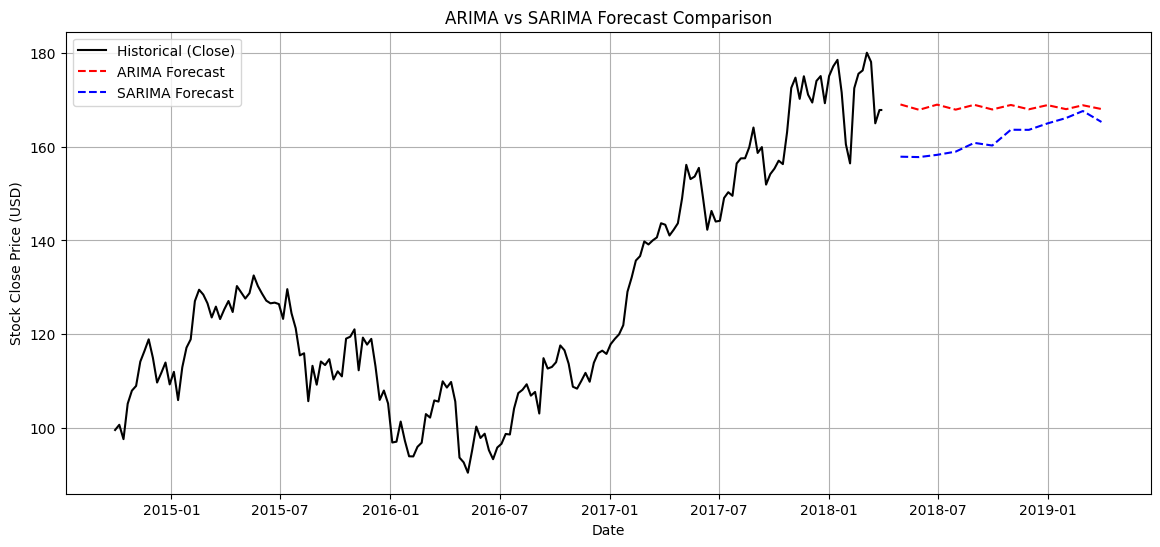

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate forecast index for next 12 months
forecast_index = pd.date_range(start=close.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Forecast using ARIMA
forecast_arima = model_arima_fit.forecast(steps=12)

# Forecast using SARIMA
forecast_sarima = model_sarimax_fit.forecast(steps=12)

# Plot Historical Data + Both Forecasts
plt.figure(figsize=(14, 6))
plt.plot(close, label='Historical (Close)', color='black')
plt.plot(forecast_index, forecast_arima, label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(forecast_index, forecast_sarima, label='SARIMA Forecast', color='blue', linestyle='--')
plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Stock Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


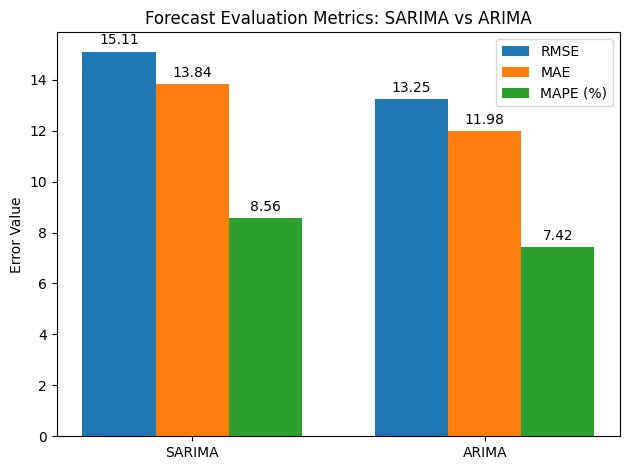

In [ ]:
# Plot Forecast Evaluation Metrics: SARIMA vs ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Updated metrics
models = ['SARIMA', 'ARIMA']
rmse = [15.1082, 13.2506]
mae = [13.8367, 11.9791]
mape = [8.56, 7.42]

x = np.arange(len(models))
width = 0.25

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width, rmse, width, label='RMSE')
bars2 = ax.bar(x, mae, width, label='MAE')
bars3 = ax.bar(x + width, mape, width, label='MAPE (%)')

# Labels and title
ax.set_ylabel('Error Value')
ax.set_title('Forecast Evaluation Metrics: SARIMA vs ARIMA')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

The bar chart compares forecast accuracy between SARIMA and ARIMA models using RMSE, MAE, and MAPE. ARIMA consistently outperforms SARIMA with lower error values across all metrics, indicating better predictive performance and greater forecasting accuracy for the dataset evaluated. This suggests ARIMA is the more suitable model here.